### 🚲 Proyecto de Análisis de Datos: Ecobici CDMX ###

Para este análisis me enfoqué particularmente en Explorar la demanda del sistema por género, visualizar las cicloestaciones con mayor actividad, evaluar el impacto ambiental generado por el uso del sistema Ecobici.

Este note-book tiene como alcance el proceso de ETL auque tambien se hacen algunas visualizaciones generales de los datos

In [1]:
# Librerias 
import pandas as pd 
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt 
import seaborn as sns

Image(url =  'https://ecobici.cdmx.gob.mx/wp-content/uploads/2023/11/Ecobici_blog_930X549_A-Portada.jpg', width=700)

In [2]:
# Cargar los dataframes de pandas para visualizar los datos 
ruta2025 = "./2025-04.csv" # Registros viajes abril 2025
ruta2024 = "./2024-04.csv" # Registros viajes abril 2024
rutaUbi  = "./Ubicacion_CicloEstacion.csv"  # Informacion cicloestaciones

df25  = pd.read_csv(ruta2025)
df24  = pd.read_csv(ruta2024)
dfubi = pd.read_csv(rutaUbi, encoding='latin1')

### Analisis y limpieza [dfubi]


- contiene informacion Geografica de las cicloesatciones

In [3]:
dfubi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sistema     677 non-null    object 
 1   num_cicloe  677 non-null    object 
 2   calle_prin  677 non-null    object 
 3   calle_secu  677 non-null    object 
 4   colonia     677 non-null    object 
 5   alcaldia    677 non-null    object 
 6   latitud     677 non-null    float64
 7   longitud    677 non-null    float64
 8   sitio_de_e  677 non-null    object 
 9   estatus     677 non-null    object 
dtypes: float64(2), object(8)
memory usage: 77.4+ KB


In [4]:
# Muestra aleatoria de las filas en el DF
dfubi.sample(n=5)

,sistema,num_cicloe,calle_prin,calle_secu,colonia,alcaldia,latitud,longitud,sitio_de_e,estatus
589,Ecobici,103,Joaquin Velazquez de Leon,Garcia Icazbalceta,San Rafael,Cuauhtemoc,19.441533,-99.165268,Arroyo,Instalada
752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,Ecobici,678,Francia,Tecoyotitla,Florida,Alvaro Obregon,19.358863,-99.182930,Arroyo,Instalada
354,Ecobici,457,Av. Prado Norte,Explanada,Lomas de Chapultepec Seccion V,Miguel Hidalgo,19.427030,-99.212845,Arroyo,Instalada
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Valores nulos 
dfubi.isnull().sum()

sistema       312
num_cicloe    312
calle_prin    312
calle_secu    312
colonia       312
alcaldia      312
latitud       312
longitud      312
sitio_de_e    312
estatus       312
dtype: int64

### Estructura del dataset
Tenemos 677 registros del dataset, pero hay 312 filas que no contienen registros algunos, la manera en que los voy a tratar es eliminar los datos null de la columna latitud, con eso comprobaria que son los mismos datos null de las demas columnas.
Si no fuera el caso trataria ambas columnas 

El data set esta conformado por 10 columnas, particularmente me interesan 3 [latitud], [longitud], [num_cicloe].


In [6]:
# Sobrescribe el mismo DataFrame limpio de valores null 
dfubi = dfubi[dfubi["latitud"].notnull()]

In [7]:
# Type casting 
dfubi["num_cicloe"] = dfubi["num_cicloe"].astype("category")

### Analisis y Limpieza [df25], [df24]

- Contienen infomacion sobre el sistema de ecobici en las fechas indicadas



In [8]:
# Informacion general de los DF de abril 2024-2025
df25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727987 entries, 0 to 1727986
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 118.7+ MB


In [9]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961633 entries, 0 to 1961632
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 134.7+ MB


### Analizar y limpiar los registros de uso 

In [10]:
# Concatenar las dos tablas 
df2425 = pd.concat([df24,df25], ignore_index=True)

In [11]:
df2425.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689620 entries, 0 to 3689619
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 253.3+ MB


In [12]:
# Muestra aleatoria de los registros 
df2425.sample(n=10)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
3181933,M,30.0,5729389,052,22/04/2025,19:17:16,003,22/04/2025,19:28:04
2525156,M,29.0,3270188,190,09/04/2025,22:41:45,077,09/04/2025,22:45:42
1440472,M,23.0,4201141,263,23/04/2024,10:33:31,552,23/04/2024,10:41:42
2919483,M,39.0,4852638,366,16/04/2025,22:32:42,366,16/04/2025,23:09:19
3024007,M,38.0,2065027,644,19/04/2025,18:58:51,700,19/04/2025,19:14:01
2808553,M,40.0,2703114,291,15/04/2025,07:35:27,117,15/04/2025,07:54:10
1364028,F,28.0,7561681,103,22/04/2024,08:21:02,217,22/04/2024,08:47:08
2621800,M,26.0,2401495,142,11/04/2025,13:50:07,006,11/04/2025,14:02:59
2591273,M,29.0,7785009,688,10/04/2025,21:56:53,691,10/04/2025,22:01:00
3264211,M,52.0,8773533,271-272,24/04/2025,06:34:48,200,24/04/2025,06:57:54


In [13]:
# Identificar Valores nulos 
df2425.isnull().sum()

Genero_Usuario             2
Edad_Usuario             134
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
dtype: int64

### Estructura del data set 

- El dataset del 2025 (df25) contiene 1,727,987 registros y esta conformado por 9 columnas 
- Dataset 2024 contiene 1,961,633 registros y esta conformado con la misma estructura del otro dataset 
- Tratamiento valores nulos  se eliminan debido a que  representan una minima cantidad de registros 
- Conversion de DataTime formato Fecha y Hora en una nueva columna y posterior mente eliminamos las columnas repetidas
- Las columnas que contienen informacion sobre las ciclo estaciones tienen un error quiza en la captura 121-122 para medios de este analisis tomaremos el primer valor de la cicloestacion 
- vamos a tratar los valores nulos considerando la cantidad de registros 


In [14]:
# Registros nulos 
df2425 = df2425.dropna()

In [15]:
# generamos columna Formato Datatime Feha-Hora 
# la funcion acepta solo formato string 
df2425['FechaHora_Arribo'] = pd.to_datetime(
    df2425['Fecha_Arribo']+ ' ' + df2425['Hora_Arribo'], 
    dayfirst = True) #indica el formato es %d/%m/%y 
df2425['FechaHora_Retiro'] = pd.to_datetime(
    df2425['Fecha_Retiro']+ ' ' + df2425['Hora_Retiro'],
    dayfirst = True)

# limpiamos las columnas que ya tenemos su info 
# eliminamos con la funcion drop 
# axis indica la direccion a operar (0 = filas, 1 = columnas) 
df2425 = df2425.drop(['Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo', 'Hora_Arribo'], axis=1, )

# Type Casting 
df2425['Genero_Usuario'] = df2425['Genero_Usuario'].astype('category')
df2425['Edad_Usuario'] = df2425['Edad_Usuario'].astype(int)

### Columnas Registro de cicloestaciones

Visualizamos valores que tienen problemas con el formato 

119-120

In [16]:
# srt permite acceso a funciones de str 
# strip elimina espacios y saltos de linea \
# isnumeric devuelve True si el conteido es numerico 
# ~ operador logico negativio es como un IS NOT NULL 
df2425[~df2425['Ciclo_EstacionArribo'].str.strip().str.isnumeric()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,FechaHora_Arribo,FechaHora_Retiro
38,F,27,7481898,228,237-238,2024-04-01 00:06:09,2024-03-31 23:26:07
57,M,23,7229172,644,445-446,2024-04-01 00:09:30,2024-04-01 00:05:13
143,F,25,5995204,055,271-272,2024-04-01 00:23:30,2024-04-01 00:01:21
240,M,34,4799300,617,271-272,2024-04-01 00:52:35,2024-04-01 00:15:24
295,F,34,3649266,552,107-108,2024-04-01 05:21:11,2024-04-01 05:04:29
...,...,...,...,...,...,...,...
3689496,M,25,4393112,354,390-391,2025-04-30 23:52:48,2025-04-30 23:46:57
3689505,M,27,7284979,137,158-159,2025-04-30 23:53:33,2025-04-30 23:46:30
3689552,M,19,3636123,543,264-275,2025-04-30 23:56:16,2025-04-30 23:46:31
3689555,F,24,5519996,239,264-275,2025-04-30 23:56:21,2025-04-30 23:35:04


In [17]:
df2425[~df2425['Ciclo_Estacion_Retiro'].str.strip().str.isnumeric()]

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,FechaHora_Arribo,FechaHora_Retiro
21,M,34,6987044,158-159,277,2024-04-01 00:03:42,2024-03-31 23:50:14
23,M,23,4914446,271-272,006,2024-04-01 00:03:48,2024-03-31 23:51:56
26,M,35,2856227,107-108,119,2024-04-01 00:04:48,2024-04-01 00:01:41
41,M,39,4409496,107-108,102,2024-04-01 00:06:39,2024-04-01 00:01:08
51,M,38,7373426,192-193,027,2024-04-01 00:08:27,2024-03-31 23:46:02
...,...,...,...,...,...,...,...
3689519,M,22,5070792,271-272,491,2025-04-30 23:54:33,2025-04-30 23:34:37
3689521,M,27,5946132,271-272,491,2025-04-30 23:54:35,2025-04-30 23:39:08
3689534,M,39,6882179,237-238,030,2025-04-30 23:55:22,2025-04-30 23:41:42
3689568,M,49,7084502,271-272,255,2025-04-30 23:57:00,2025-04-30 23:45:42


Considerado las dos columnas tenemos 337,502 registros que tienen este problema, estos registros representan el 9% de la muestra, de cualquier forma estos datos van a ser tratados 

In [18]:
# Tratamos las columnas ciclo esatciones 
df2425['Ciclo_EstacionArribo'] = (
    df2425['Ciclo_EstacionArribo']
    .astype(str)
    .str.extract(r'(\d+)',  # r = cadena cruda expresion regular 
    expand = False)) # controla el tipo de resultado los grupos se guardan en filas no en columnas 
                  # ya que extract devuelve una serie de pandas, una sola columna df
                  
df2425['Ciclo_Estacion_Retiro'] = (
    df2425['Ciclo_Estacion_Retiro']
    .astype(str)
    .str.extract(r'(\d+)',
    expand = False))                  

In [19]:
df2425.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3689486 entries, 0 to 3689619
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         category      
 1   Edad_Usuario           int64         
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Ciclo_EstacionArribo   object        
 5   FechaHora_Arribo       datetime64[ns]
 6   FechaHora_Retiro       datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(2)
memory usage: 200.6+ MB


### Analisis de valores en la columna genero ###


Agrupamos las categorias y mantenemos M(masculino) F(femenino) O(No identificado)


In [20]:
print(df2425['Genero_Usuario'].value_counts())


Genero_Usuario
M    2529077
F    1057394
O      70383
?      32632
Name: count, dtype: int64


In [21]:
df2425['Genero_Usuario'] = df2425['Genero_Usuario'].replace({'?':'O'})

/var/folders/zw/xggmrqy96qs0v1jbjf18bdmr0000gn/T/ipykernel_14199/2407895087.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df2425['Genero_Usuario'] = df2425['Genero_Usuario'].replace({'?':'O'})


### Generamos los JOIN

Al realizar un left join entre la tabla de arribos y la tabla con la información geográfica de las cicloestaciones, se conservarán todos los registros de la tabla de arribos, incluso aquellos que no tengan datos correspondientes en la tabla geográfica.

In [22]:

# LEFT JOIN: une todo df_concat con dfubi por ID, conserva todos los de la izquierda
df2425 = pd.merge(
    df2425,
    dfubi[['num_cicloe', 'latitud', 'longitud', 'alcaldia', 'colonia']],
    how      = 'left',
    left_on  = 'Ciclo_EstacionArribo',
    right_on = 'num_cicloe').drop(columns = ['num_cicloe']) # columna repetida 



In [23]:
df2425.rename(columns = {
    'latitud'  : 'latitud_arribo',
    'longitud' : 'longitud_arribo',
    'alcaldia' : 'alcaldia_arribo',
    'colonia'  : 'colonia_arribo'}, inplace = True)

In [24]:
df2425.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689486 entries, 0 to 3689485
Data columns (total 11 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         category      
 1   Edad_Usuario           int64         
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Ciclo_EstacionArribo   object        
 5   FechaHora_Arribo       datetime64[ns]
 6   FechaHora_Retiro       datetime64[ns]
 7   latitud_arribo         float64       
 8   longitud_arribo        float64       
 9   alcaldia_arribo        object        
 10  colonia_arribo         object        
dtypes: category(1), datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 285.0+ MB


### Datos en csv para usar con tableu

In [25]:
df2425.to_csv('DatosEcocbici.csv', index=False, date_format="%Y-%m-%d %H:%M:%S")

### Analisis demanda por genero 

Hay muy poco cambio en Porcentaje de demanda por genero en esos dos años 

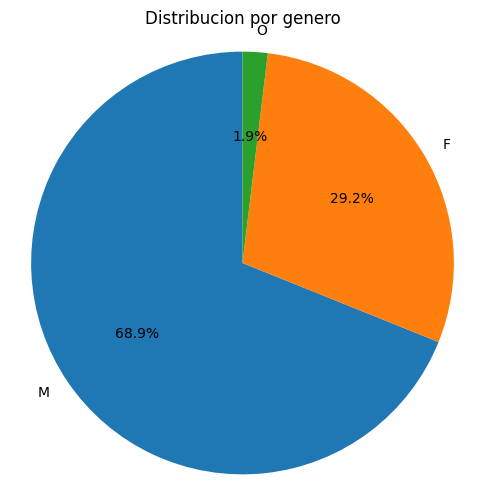

In [26]:
# filtro para ver la demanda por genero por año 
df_2024 = df2425[df2425['FechaHora_Arribo'].dt.year == 2024]
# recuento de registros por categoria 
counts_2024 = df_2024['Genero_Usuario'].value_counts()

# Grafico de pastel 

plt.figure(figsize = (6,6))
plt.pie(counts_2024, labels = counts_2024.index, autopct = '%1.1f%%', startangle=90)
plt.title('Distribucion por genero')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()



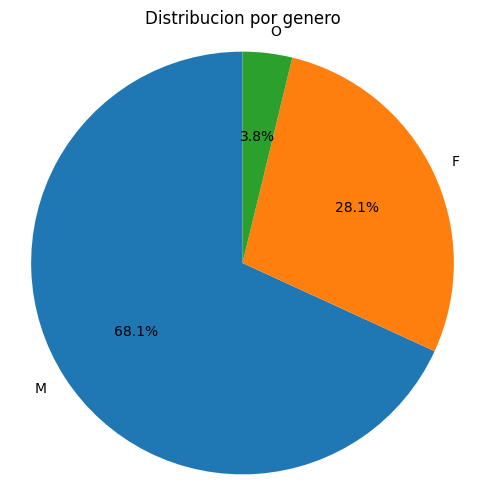

In [27]:
# filtro para ver la demanda por genero por año 
df_2025 = df2425[df2425['FechaHora_Arribo'].dt.year == 2025]
# recuento de registros por categoria 
counts_2025 = df_2025['Genero_Usuario'].value_counts()

# Grafico de pastel 

plt.figure(figsize = (6,6))
plt.pie(counts_2025, labels = counts_2025.index, autopct = '%1.1f%%', startangle=90)
plt.title('Distribucion por genero')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

### Analizar la distribucion de edades de los usuarios en los arribos generales 

- El bogote inferiror indica que el la edad minima de la mayoria de los datos 
- El bigote superior indica que la edad maxima de la mayoria de los datos es 
- ignoramos los valores atipicos ya que pueden ser un error de captura y no interfieren con el analisis 
- Categorizamos por genero de usuario
- Se hace un analisis mas profundo en tableu

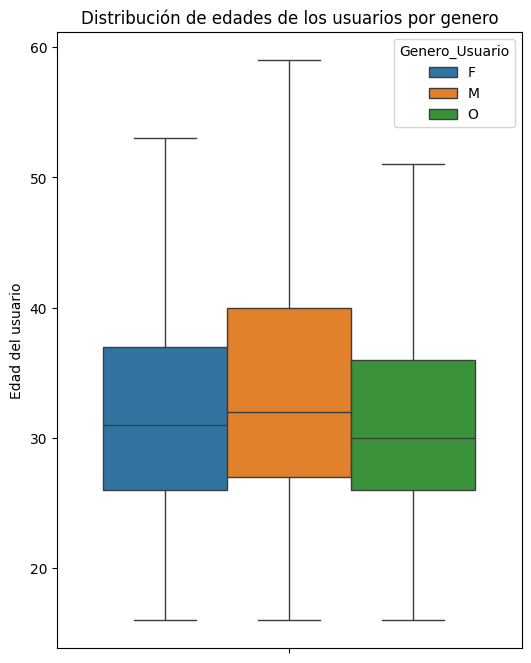

In [28]:
plt.figure(figsize=(6,8))
sns.boxplot(y=df2425['Edad_Usuario'],
            hue= df2425['Genero_Usuario'],
            showfliers = False) 
plt.title('Distribución de edades de los usuarios por genero')
plt.ylabel('Edad del usuario')
plt.show()

In [29]:
df2425.sample(n=10)

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,FechaHora_Arribo,FechaHora_Retiro,latitud_arribo,longitud_arribo,alcaldia_arribo,colonia_arribo
2526241,F,36,8170151,685,417,2025-04-09 23:32:27,2025-04-09 23:13:52,19.373198,-99.184274,Benito Juarez,Insurgentes Mixcoac
3427895,M,54,7348550,075,152,2025-04-26 18:23:08,2025-04-26 18:16:27,19.409098,-99.167181,Cuauhtemoc,Roma Sur
1657568,M,27,5288410,638,621,2024-04-26 07:43:49,2024-04-26 07:34:20,19.379458,-99.140943,Benito Juarez,Americas Unidas
1041744,M,24,8169633,618,575,2024-04-16 22:03:24,2024-04-16 21:51:34,19.413235,-99.143476,Cuauhtemoc,Obrera
2156880,M,23,6625909,056,001,2025-04-03 19:28:51,2025-04-03 19:19:09,19.433590,-99.167819,Cuauhtemoc,Cuauhtemoc
2577484,F,61,8474280,689,692,2025-04-10 18:48:49,2025-04-10 18:42:54,19.349149,-99.169646,Coyoacan,Santa Catarina
3634642,M,26,5293584,308,365,2025-04-30 09:31:14,2025-04-30 09:19:11,19.381123,-99.186670,Benito Juarez,Nonoalco
1009235,F,33,5405196,560,134,2024-04-16 16:00:21,2024-04-16 15:50:56,19.418304,-99.159560,Cuauhtemoc,Roma Norte
3184027,M,25,4569174,384,129,2025-04-22 19:53:59,2025-04-22 19:34:06,19.420600,-99.163312,Cuauhtemoc,Roma Norte
289147,F,33,2817906,070,169,2024-04-05 09:16:32,2024-04-05 09:09:00,19.403019,-99.174934,Miguel Hidalgo,Escandon
